# Importing libraries and reading dataset

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("/kaggle/input/average-cost-of-undergraduate-student-by-state-usa/nces330_20.csv")
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


# Checking for NA values

In [3]:
df.isnull().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [4]:
df.nunique()

Year          9
State        51
Type          3
Length        2
Expense       2
Value      2861
dtype: int64

In [5]:
df["Year"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

# Data manipulation

In [6]:
# label encoding all features 
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_label=pd.DataFrame()
df_label["Year"]=df["Year"]

df_label['State']= label_encoder.fit_transform(df['State'])
df_label['Type']= label_encoder.fit_transform(df['Type'])
df_label['Length']= label_encoder.fit_transform(df['Length'])
df_label['Expense']= label_encoder.fit_transform(df['Expense'])
df_label["Value"]=df["Value"]

# Visualization

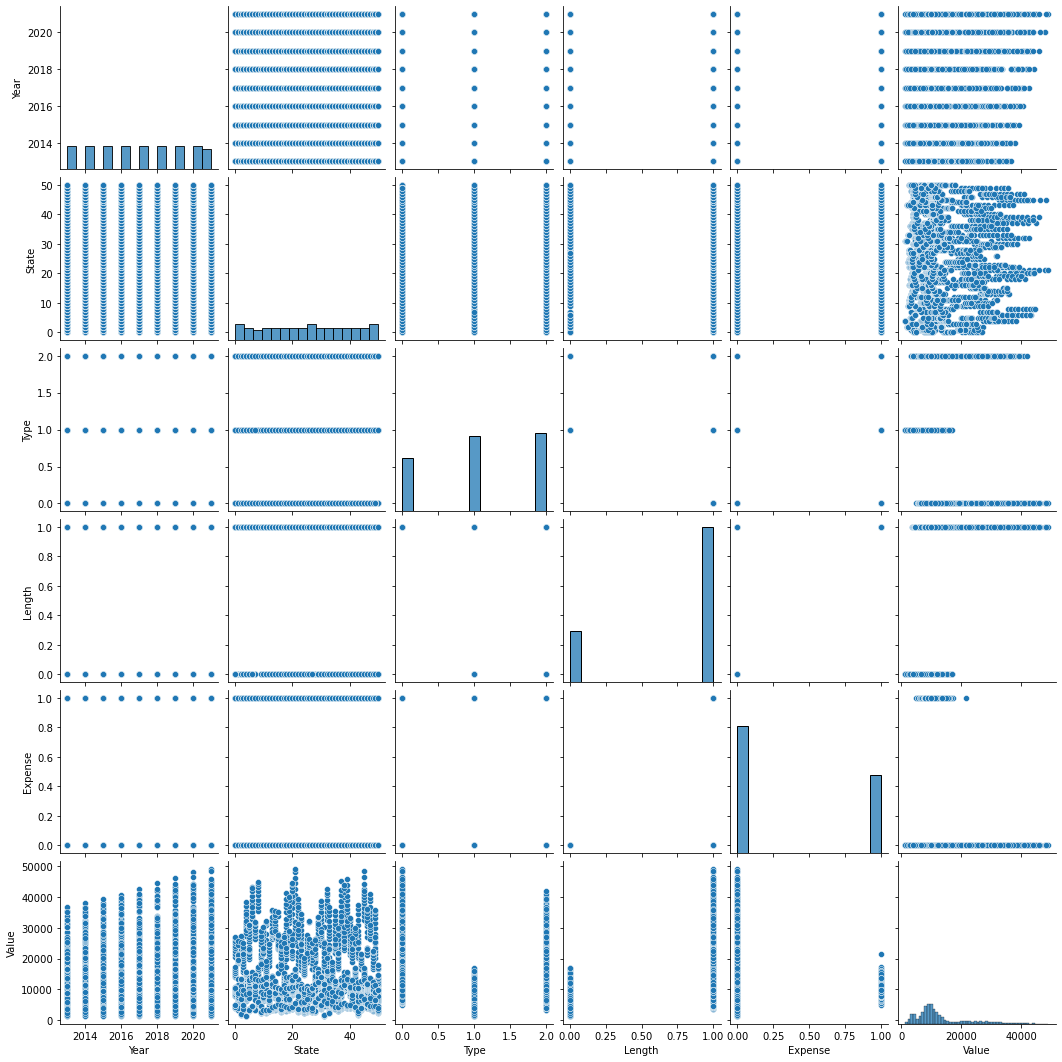

In [7]:
# pairplot helps make bivarient analysis to see which features can be explored
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.pairplot(df_label)
plt.show()

# Model implementation

In [8]:
# Linear regression

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

features=df.drop("Value", axis=1)
label=df["Value"]

one_hot_features = pd.get_dummies(features)

X_train, X_test, y_train, y_test = train_test_split(one_hot_features, label, test_size=0.2, random_state=1)

clf = LinearRegression()
clf = clf.fit(X_train,y_train)

In [9]:
clf.score(X_test, y_test)*100

68.4564959852041